<a href="https://colab.research.google.com/github/st0203/Data-Bootcamp-Final-Personalized-Diet-Recommendation-System/blob/main/Copy_of_Diet_Recommendations_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_path = '/content/sample_data/Personalized_Diet_Recommendations.csv'
diet = pd.read_csv(data_path)

In [ ]:
diet.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet


In [ ]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                5000 non-null   object 
 1   Age                       5000 non-null   int64  
 2   Gender                    5000 non-null   object 
 3   Height_cm                 5000 non-null   int64  
 4   Weight_kg                 5000 non-null   int64  
 5   BMI                       5000 non-null   float64
 6   Chronic_Disease           2957 non-null   object 
 7   Blood_Pressure_Systolic   5000 non-null   int64  
 8   Blood_Pressure_Diastolic  5000 non-null   int64  
 9   Cholesterol_Level         5000 non-null   int64  
 10  Blood_Sugar_Level         5000 non-null   int64  
 11  Genetic_Risk_Factor       5000 non-null   object 
 12  Allergies                 1503 non-null   object 
 13  Daily_Steps               5000 non-null   int64  
 14  Exercise

In [ ]:
#fill null values
diet['Allergies'].fillna('None', inplace=True)
diet['Chronic_Disease'].fillna("None", inplace=True)
diet['Food_Aversions'].fillna("None", inplace=True)

<ipython-input-53-6c92939ba10e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diet['Allergies'].fillna('None', inplace=True)
<ipython-input-53-6c92939ba10e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
#drop patient ID, recommended carbs, fats, calories, and proteins
diet.drop(['Patient_ID', 'Recommended_Carbs', 'Recommended_Fats', 'Recommended_Calories', 'Recommended_Protein'], axis=1, inplace=True)

In [ ]:
diet.shape

(5000, 30)

In [ ]:
#Check unique values for Chronic_Disease, Genetic Risk Factor,  Allergies, Alchohol Consumption, Smoking Habit, Dietary Habit, Preferred Cuisine, and Food Aversions
diet['Chronic_Disease'].unique()

array(['None', 'Hypertension', 'Diabetes', 'Heart Disease', 'Obesity'],
      dtype=object)

In [ ]:
diet['Genetic_Risk_Factor'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
diet['Preferred_Cuisine'].unique()

array(['Western', 'Mediterranean', 'Indian', 'Asian'], dtype=object)

In [ ]:
diet['Recommended_Meal_Plan'].unique()

array(['High-Protein Diet', 'Balanced Diet', 'Low-Fat Diet',
       'Low-Carb Diet'], dtype=object)

In [ ]:
diet['Dietary_Habits'].unique()

array(['Vegetarian', 'Regular', 'Keto', 'Vegan'], dtype=object)

#Exploring the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-13-95da7f1ef5e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, palette = "viridis"  )


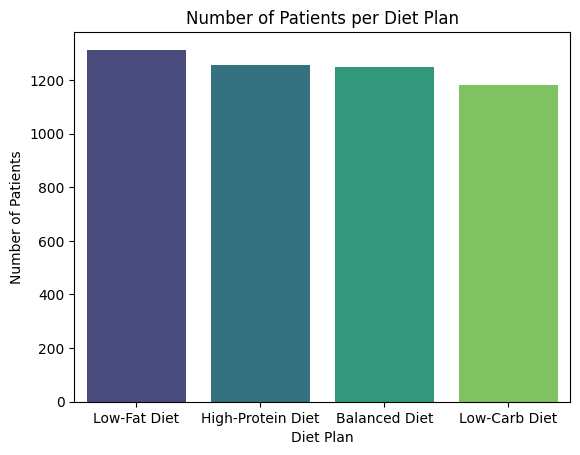

In [ ]:
#How many patients fall under each Diet Plan category?
data = diet['Recommended_Meal_Plan'].value_counts()
sns.barplot(data, palette = "viridis"  )
plt.xlabel('Diet Plan')
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Diet Plan')
plt.show()

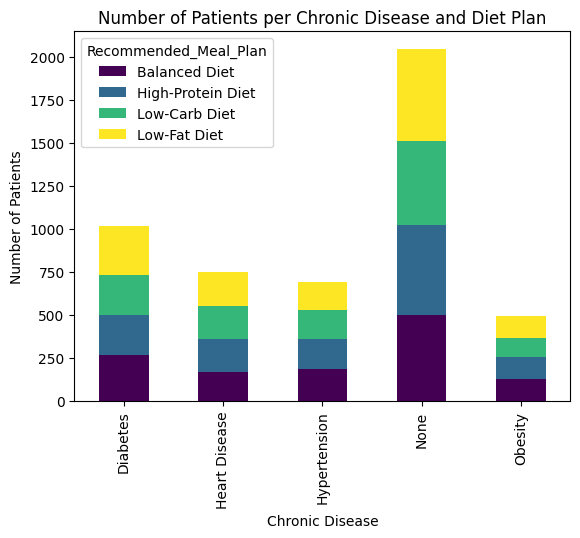

In [ ]:
#For each Chronic Disease category, geroup patients by diet plan
data = diet.groupby(['Chronic_Disease', 'Recommended_Meal_Plan']).size().unstack()
data.plot(kind='bar', stacked=True, cmap = 'viridis' )
plt.xlabel('Chronic Disease')
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Chronic Disease and Diet Plan')
plt.show()

In [ ]:
#Medical History numerical features – blood pressure, cholesterol, and blood sugar
#Patient Demographics numerical features– Age, gender, height, weight, and BMI.
#Lifestyle Data – Daily steps, exercise frequency, sleep quality, alcohol and smoking habits.
#diet habits -Caloric_Intake

<ipython-input-39-0e30d9dd0d64>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Recommended_Meal_Plan", y=Y, data=diet, palette="Set2", ax=axes[row, col]) # Pass axes[row, col] to access the correct Axes object
<ipython-input-39-0e30d9dd0d64>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Recommended_Meal_Plan", y=Y, data=diet, palette="Set2", ax=axes[row, col]) # Pass axes[row, col] to access the correct Axes object
<ipython-input-39-0e30d9dd0d64>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Recommended_Meal_Plan", y=Y, d

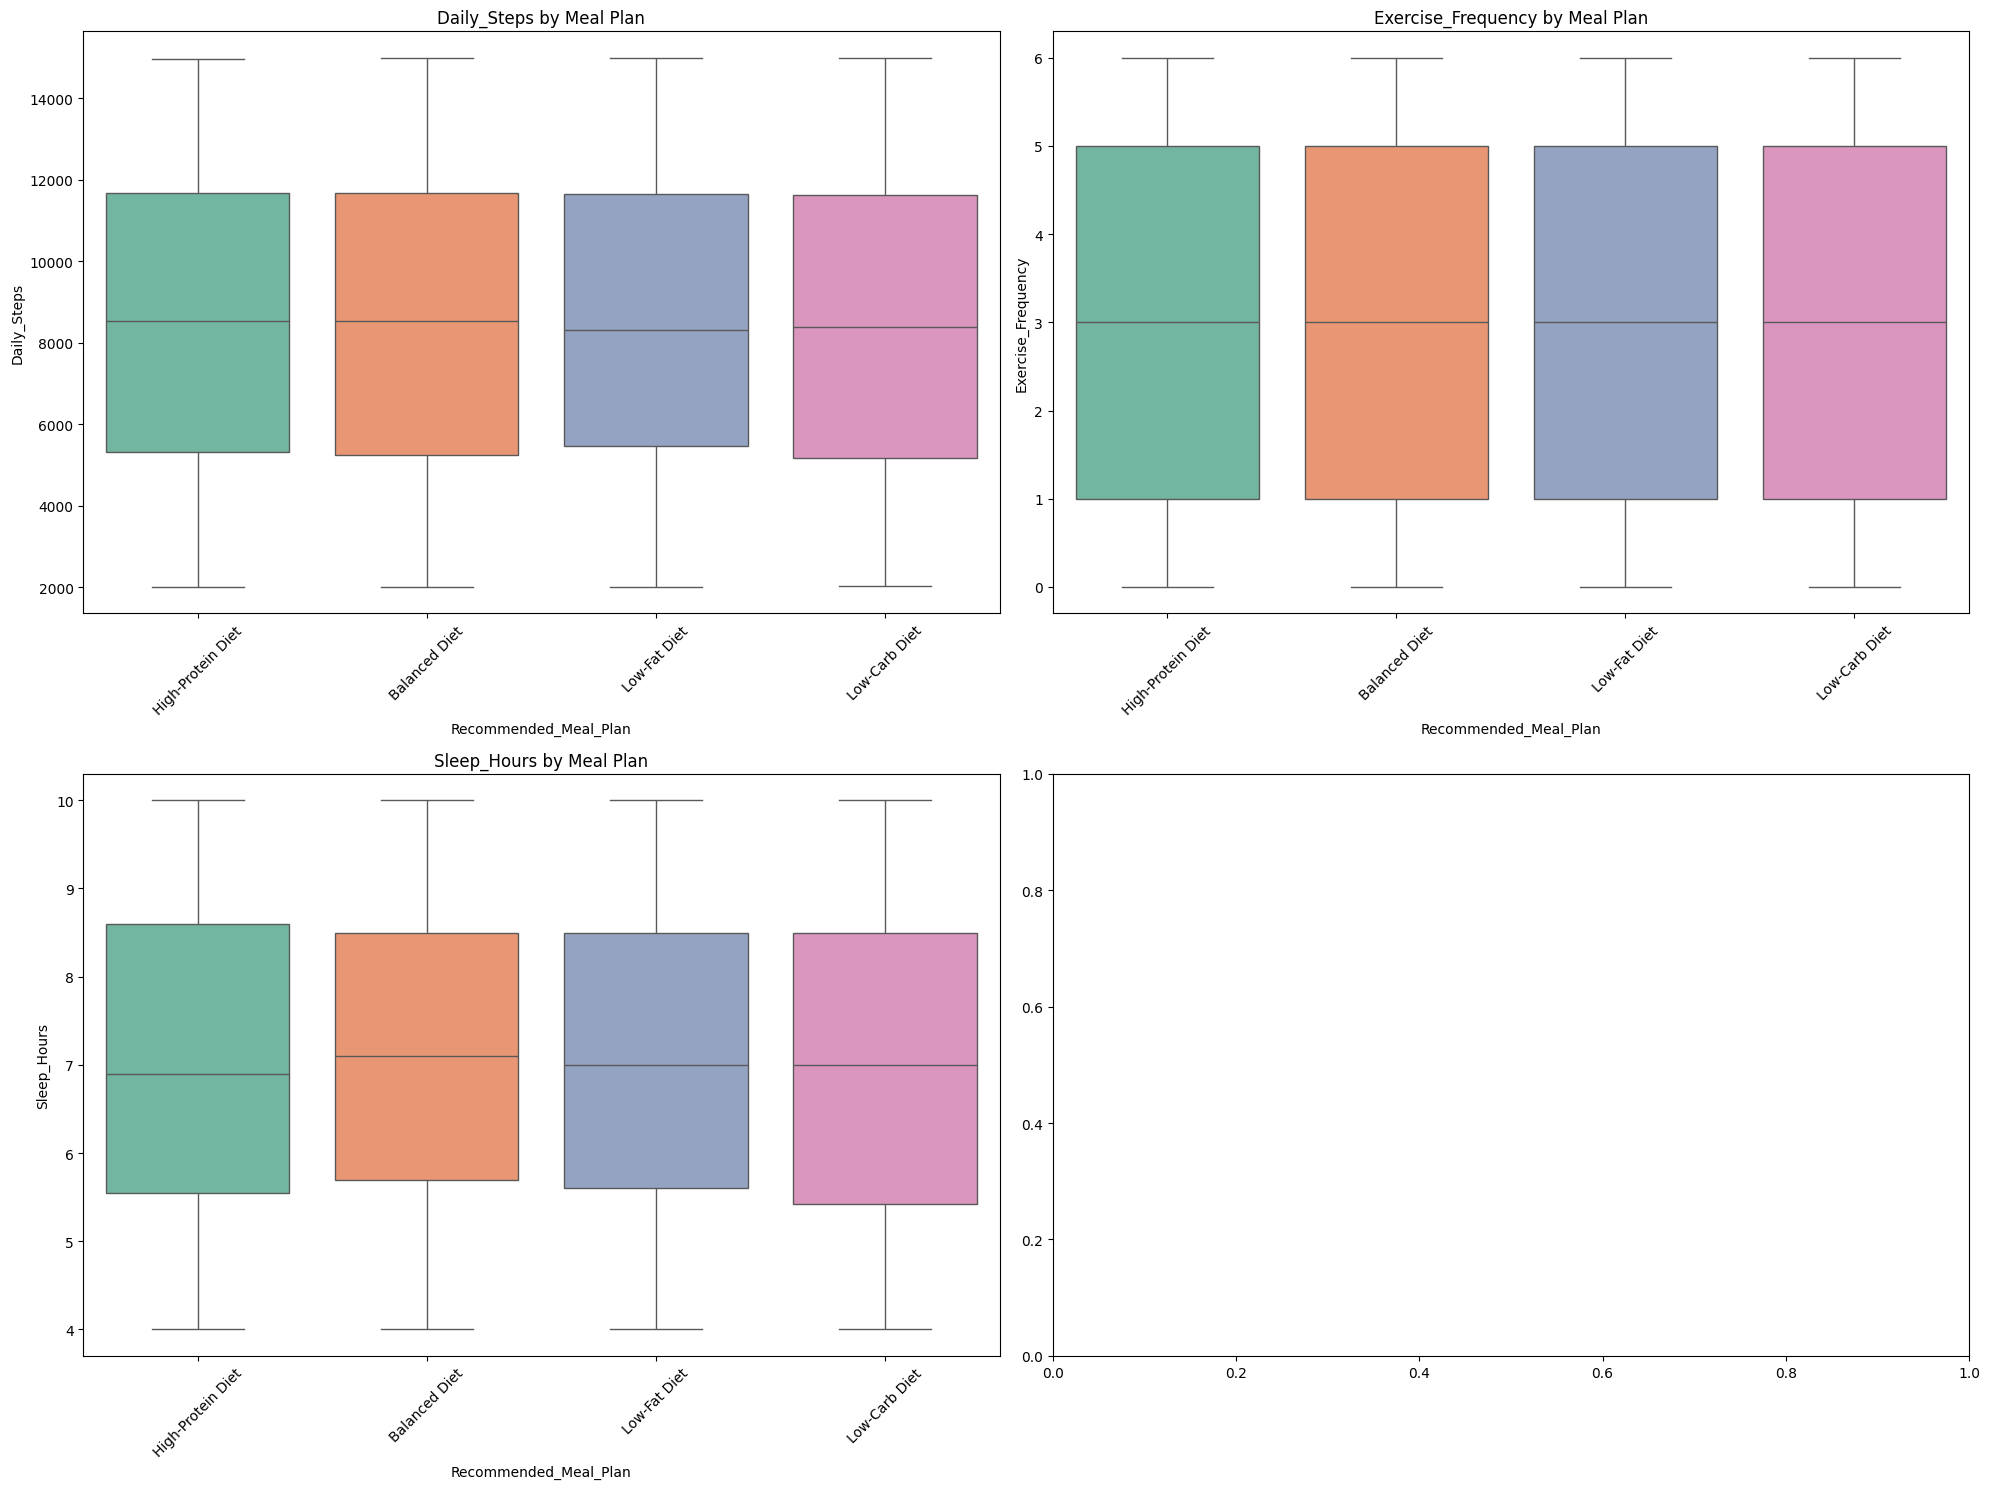

In [ ]:
#Create box plot of numerical features against each meal plan?
#medical_numeric = ["Blood_Pressure_Systolic", "Blood_Pressure_Diastolic", "Cholesterol_Level", "Blood_Sugar_Level"]
#demographics_numeric = ["Age", "Height_cm", "Weight_kg", "BMI"]
lifestyle_numeric = ['Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours']
#Diet_habits = ['Caloric_Intake', 'Protein_Intake', 'Carbohydrate_Intake', 'Fat_Intake']
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Loop through each column and plot
for i, Y in enumerate(lifestyle_numeric):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    sns.boxplot(x="Recommended_Meal_Plan", y=Y, data=diet, palette="Set2", ax=axes[row, col]) # Pass axes[row, col] to access the correct Axes object
    axes[row, col].set_title(f"{Y} by Meal Plan")
    axes[row, col].tick_params(axis='x', rotation=45)
    #axes[row, col].set_ylim(bottom=0, top = 200)  # Set y-axis to start at 0
plt.tight_layout()
plt.show()

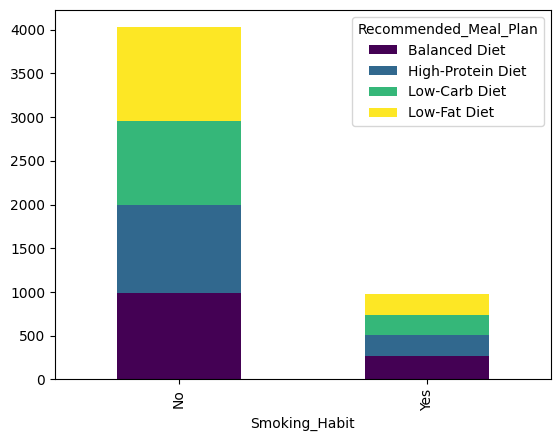

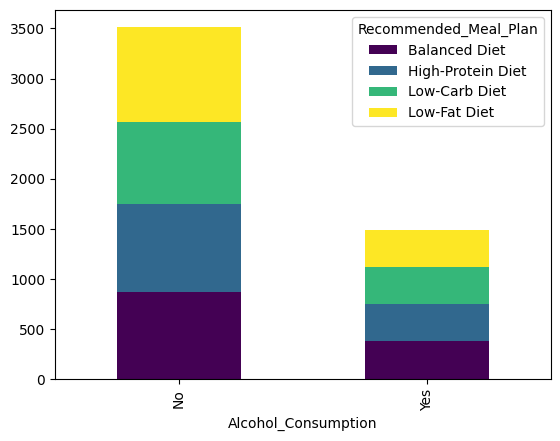

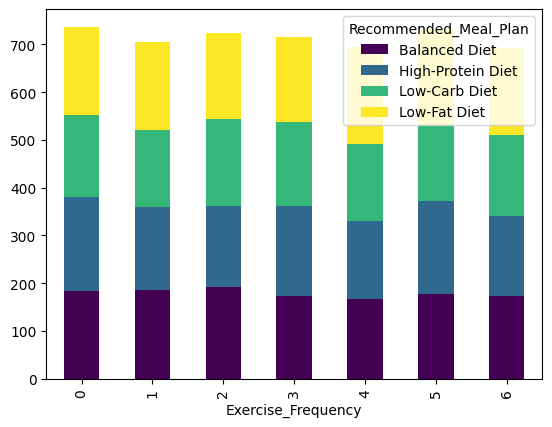

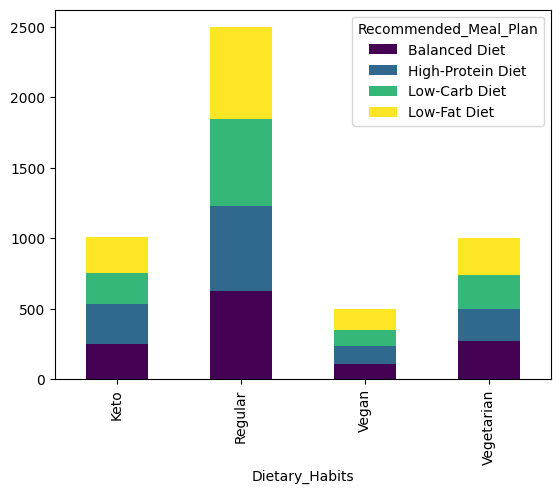

In [ ]:
#Plot barplots for relationships between categorical features and meal plan
Habits = ["Smoking_Habit", "Alcohol_Consumption", "Exercise_Frequency", "Dietary_Habits"]
#Count number of people with chronic disease by smoking habit
for habit in Habits:
  data = diet.groupby([habit, 'Recommended_Meal_Plan']).size().unstack()
  data.plot(kind='bar', stacked=True, cmap = 'viridis' )

In [ ]:
#Okay, so it seems like Recommmended Meal Plan isn't a very strongly correlated feature to anything.
#Let's try and see if Recommended_Protein might be a better feature to predict!

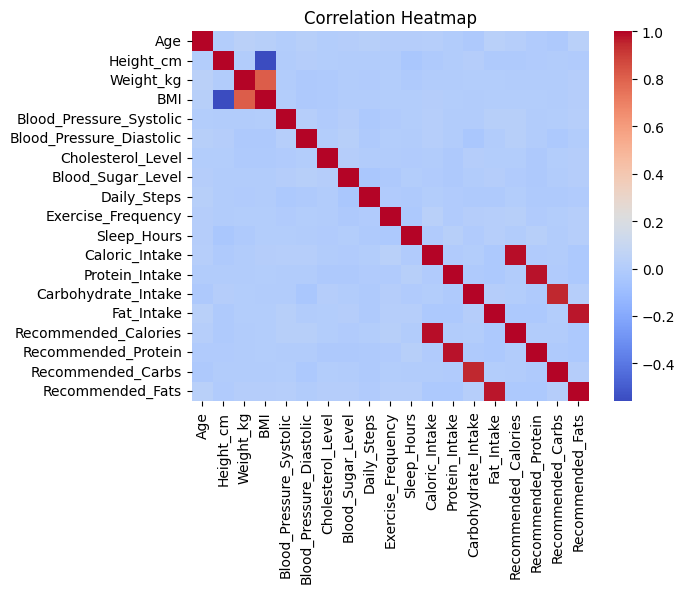

In [ ]:
sns.heatmap(diet.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()